# PROJET FINAL: Analyse de données et machine learning avec Python

Il s'agit d'analyser les données collectées sur la pandémie du covid 19 qui sont dans un fichier au format csv (voir dossier *data*).

## Description du jeu du données:

### Contexte

La maladie à coronavirus (COVID-19) est une maladie infectieuse causée par un coronavirus récemment découvert. La plupart des personnes infectées par le virus COVID-19 souffriront d'une maladie respiratoire légère à modérée et se rétabliront sans nécessiter de traitement particulier. Les personnes âgées et celles qui présentent des problèmes médicaux sous-jacents tels que les maladies cardiovasculaires, le diabète, les maladies respiratoires chroniques et le cancer sont plus susceptibles de développer une maladie grave.

Pendant toute la durée de la pandémie, l'un des principaux problèmes auxquels les prestataires de soins de santé ont été confrontés est le manque de ressources médicales et d'un plan approprié pour les distribuer efficacement. En ces temps difficiles, être capable de prédire le type de ressources dont un individu pourrait avoir besoin au moment où il est testé positif ou même avant cela sera d'une aide immense pour les autorités car elles seront en mesure de se procurer et d'organiser les ressources nécessaires pour sauver la vie de ce patient.

L'objectif principal de ce projet est de construire un modèle d'apprentissage automatique qui, compte tenu des symptômes, de l'état et des antécédents médicaux d'un patient atteint du Covid-19, permettra de prédire si le patient est à haut risque ou non.

### Description du jeux de données

Le jeu de données a été fourni par le gouvernement mexicain. Cet ensemble de données contient un nombre énorme d'informations anonymes relatives aux patients, y compris les conditions préalables. L'ensemble de données brutes se compose de 21 caractéristiques uniques et de 1 048 576 patients uniques. Dans les caractéristiques booléennes, 1 signifie "oui" et 2 signifie "non". Les valeurs 97 et 99 indique des données manquantes.

Quelques informations sur les *features*:

- sex : femme ou homme
- age : du patient.
- classification : résultats du test covid. Les valeurs 1-3 signifient que le patient a été diagnostiqué avec un covid à différents degrés. 4 ou plus signifie que le patient n'est pas porteur du covid ou que le test n'est pas concluant.
- patient type: hospitalisé ou non hospitalisé.
- pneumonia : si le patient a déjà une inflammation lié à la pneumonie ou non.
- pregnancy : si la patiente est enceinte ou non.
- diabetes : indique si le patient est diabétique ou non.
- copd: indique si le patient est atteint ou non de bronchopneumopathie chronique obstructive.
- asthma : indique si le patient est asthmatique ou non.
- inmsupr : indique si le patient est immunodéprimé ou non.
- hypertension : si le patient est hypertendu ou non.
- cardiovascular : si le patient est atteint d'une maladie du cœur ou des vaisseaux sanguins.
- renal chronic : si le patient est atteint d'une maladie rénale chronique ou non.
- other disease : si le patient est atteint d'une autre maladie ou non.
- obesity : si le patient est obèse ou non.
- tobacco : si le patient est un fumeur.
- usmr : indique si le patient a traité des unités médicales de premier, deuxième ou troisième niveau.
- medical unit: type d'institution du système national de santé qui a dispensé les soins.
- intubed : indique si le patient a été relié au ventilateur.
- icu : indique si le patient a été admis dans une unité de soins intensifs.


## Étape 1 : Préparation et nettoyage des données
1. Chargez le jeu de données  dans un *dataframe* à l'aide de Pandas.
2. Explorez le nombre de lignes et de colonnes, les plages de valeurs, etc.
3. Traitez les données manquantes, incorrectes et invalides, doublons, etc.
4. Effectuez toute étape supplémentaire (analyse des dates, création de colonnes supplémentaires, fusion de plusieurs ensembles de données, etc.)

## Chargez le jeu de données dans un dataframe à l'aide de Pandas

In [139]:
# Importation des données 
import pandas as pd
import numpy as np

In [140]:
# Chargement du jeu de données 
df = pd.read_csv("C:\\Users\\Koffi Bekanti Grace\\OneDrive - Metrics & Decisions\\Bureau\\EXO DE COURS INPHB\\transfers\\2026-01\\7-Projet Final\\data\\covid19_data.csv" , sep=";")
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


## Explorez le nombre de lignes et de colonnes, les plages de valeurs, etc.

In [141]:
# Explorez le nombre de lignes et de colonnes
df.shape

(1048575, 21)

On a  1048575 lignes et 21 colonnes dans notre jeu de Données 

In [142]:
# Affiche les 5 premières lignes
df.head() 

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## Traitez les données manquantes, incorrectes et invalides, doublons, etc. et Effectuez toute étape supplémentaire (analyse des dates, création de colonnes supplémentaires, fusion de plusieurs ensembles de données, etc.)

### visualisation dess valeurs manquantes

In [143]:
# Donne les types des variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Nous remarquons qu’il y a des données qui ne sont pas au bon format, comme DATE_DIED, qui devrait être au format date et 9999/99/9 est aussi des valeurs manquantes 

In [144]:
#  détecte les valeurs manquantes
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

Ici, il y a des valeurs manquantes, comme indiqué dans l’énoncé. Les valeurs 97 et 99 représentent des données manquantes.

### Traitement des données manquantes
Au niveau de la date de décès, nous ne pouvons pas supprimer les valeurs manquantes car elles contiennent des informations importantes. Nous allons donc créer une nouvelle colonne deceder, qui récupérera les informations de la colonne Date_DIED.

Cette nouvelle variable sera binaire et indiquera le statut vital :

1 : vivant (valeurs manquantes dans Date_DIED)

2 : décédé


In [145]:
#df.replace([97, 98, 99], np.nan, inplace=True)
df["DATE_DIED"] = df["DATE_DIED"].replace("9999-99-99", pd.NA)
df["DEATH"] = df["DATE_DIED"].notna().map({True: 1, False: 2})
df.drop(columns=["DATE_DIED"], inplace=True)

In [146]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,...,2,2,2,2,2,2,2,7,97,2
1048571,1,13,2,2,2,2,51,97,2,2,...,2,1,2,2,2,2,2,7,2,2
1048572,2,13,2,1,97,2,55,97,2,2,...,2,2,2,2,2,2,2,7,97,2
1048573,2,13,2,1,97,2,28,97,2,2,...,2,2,2,2,2,2,2,7,97,2


## Remplacement des valeurs 97, 98 et 99 par NaN

Remplacement des valeurs 97, 98 et 99 par NaN

Dans cette étape de prétraitement, nous procédons au remplacement des valeurs 97, 98 et 99 par NaN, afin d’identifier plus facilement les colonnes contenant des valeurs manquantes. Ces valeurs sont utilisées dans le jeu de données pour représenter des informations non renseignées ou inconnues.

Avant d’effectuer ce remplacement, nous commençons par compter le nombre de valeurs manquantes dans chaque colonne, dans le but de vérifier que seules ces valeurs correspondent réellement à des données manquantes. Bien que l’énoncé mentionne uniquement les valeurs 97 et 99 comme indicateurs de valeurs manquantes, l’exploration et la visualisation des données ont révélé la présence supplémentaire de la valeur 88.

Afin de confirmer cette observation, nous procédons au comptage de chaque valeur suspecte (88, 97, 98 et 99) une seule fois par colonne, ce qui nous permet de valider leur signification et d’assurer un nettoyage cohérent et fiable des données avant la phase d’analyse.

In [147]:
display (df["USMER"].unique())
df["USMER"].value_counts()

array([2, 1])

USMER
2    662903
1    385672
Name: count, dtype: int64

In [148]:
display (df["MEDICAL_UNIT"].unique())
df["MEDICAL_UNIT"].value_counts()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

MEDICAL_UNIT
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: count, dtype: int64

In [149]:
display (df["SEX"].unique())
df["SEX"].value_counts()

array([1, 2])

SEX
1    525064
2    523511
Name: count, dtype: int64

In [150]:
display(df["PATIENT_TYPE"].unique())
df["PATIENT_TYPE"].value_counts()

array([1, 2])

PATIENT_TYPE
1    848544
2    200031
Name: count, dtype: int64

In [151]:
display (df["INTUBED"].unique())
df["INTUBED"].value_counts()

array([97,  1,  2, 99])

INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int64

In [152]:
display (df["PNEUMONIA"].unique())
df["PNEUMONIA"].value_counts()

array([ 1,  2, 99])

PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

In [153]:
display (df["PREGNANT"].unique())
df["PREGNANT"].value_counts()

array([ 2, 97, 98,  1])

PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64

In [154]:
display (df["DIABETES"].unique())
df["DIABETES"].value_counts()

array([ 2,  1, 98])

DIABETES
2     920248
1     124989
98      3338
Name: count, dtype: int64

In [155]:
display (df["ASTHMA"].unique())
df["ASTHMA"].value_counts()

array([ 2,  1, 98])

ASTHMA
2     1014024
1       31572
98       2979
Name: count, dtype: int64

In [156]:
display (df["INMSUPR"].unique())
df["INMSUPR"].value_counts()

array([ 2,  1, 98])

INMSUPR
2     1031001
1       14170
98       3404
Name: count, dtype: int64

In [157]:
display (df["HIPERTENSION"].unique())
df["HIPERTENSION"].value_counts()

array([ 1,  2, 98])

HIPERTENSION
2     882742
1     162729
98      3104
Name: count, dtype: int64

In [158]:
display (df["OTHER_DISEASE"].unique())
df["OTHER_DISEASE"].value_counts()

array([ 2,  1, 98])

OTHER_DISEASE
2     1015490
1       28040
98       5045
Name: count, dtype: int64

In [159]:
display (df["CARDIOVASCULAR"].unique())
df["CARDIOVASCULAR"].value_counts()

array([ 2,  1, 98])

CARDIOVASCULAR
2     1024730
1       20769
98       3076
Name: count, dtype: int64

In [160]:
display (df["OBESITY"].unique())
df["OBESITY"].value_counts()

array([ 2,  1, 98])

OBESITY
2     885727
1     159816
98      3032
Name: count, dtype: int64

In [161]:
display (df["RENAL_CHRONIC"].unique())
df["RENAL_CHRONIC"].value_counts()

array([ 2,  1, 98])

RENAL_CHRONIC
2     1026665
1       18904
98       3006
Name: count, dtype: int64

In [162]:
display (df["TOBACCO"].unique())
df["TOBACCO"].value_counts()

array([ 2,  1, 98])

TOBACCO
2     960979
1      84376
98      3220
Name: count, dtype: int64

In [163]:
display (df["ICU"].unique())
df["ICU"].value_counts()

array([97,  2,  1, 99])

ICU
97    848544
2     175685
1      16858
99      7488
Name: count, dtype: int64

Avec cette approche, nous remarquons qu’il y a effectivement des valeurs manquantes (97, 98, 99) dans pratiquement toutes les colonnes. Ces valeurs représentent la majorité des informations, donc supprimer ces colonnes ferait perdre beaucoup de données importantes.

In [164]:
# Remplacer 97, 98, 99 par NaN dans toutes les colonnes sauf AGE
cols = df.columns.drop("AGE")
df[cols] = df[cols].replace([97, 98, 99], np.nan)

In [165]:
colonne_binaire = [
    "DIABETES", "COPD", "ASTHMA", "INMSUPR",
    "HIPERTENSION", "OTHER_DISEASE", "CARDIOVASCULAR",
    "OBESITY", "RENAL_CHRONIC", "TOBACCO"
]
df[colonne_binaire] = df[colonne_binaire].fillna(df.mode().iloc[0])

In [166]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,NaN,1.0,65,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
1,2,1,2,1,NaN,1.0,72,NaN,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1
2,2,1,2,2,1.0,2.0,55,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,NaN,2.0,53,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1
4,2,1,2,1,NaN,2.0,68,NaN,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaN,2.0,40,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2
1048571,1,13,2,2,2.0,2.0,51,NaN,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2
1048572,2,13,2,1,NaN,2.0,55,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2
1048573,2,13,2,1,NaN,2.0,28,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2


Au niveau de la colonne age, nous allons maintenant vérifier les valeurs aberrantes

In [167]:
## importation des libraire 
import seaborn as sns
import matplotlib.pyplot as plt

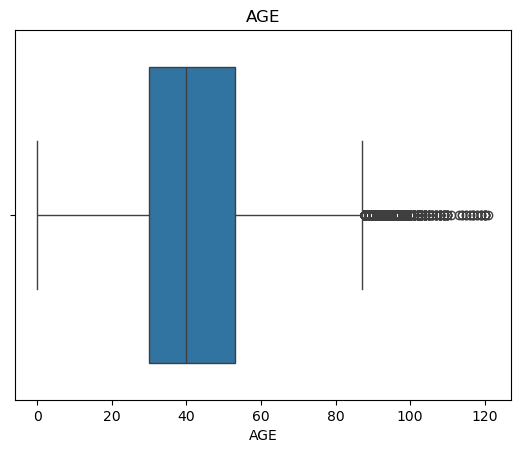

In [168]:
sns.boxplot(x=df["AGE"])
plt.title("AGE")
plt.show()

L’analyse du boxplot de l’âge a mis en évidence la présence de valeurs aberrantes au-delà de 87 ans. Afin de limiter l’influence de ces valeurs extrêmes sans supprimer d’observations, l’âge a été borné entre 0 et 87 ans, ce qui permet de réduire leur impact sur l’analyse et sur le modèle prédictif

In [169]:
# On borne l'âge entre 0 et 87
df["AGE"] = df["AGE"].clip(0, 87)

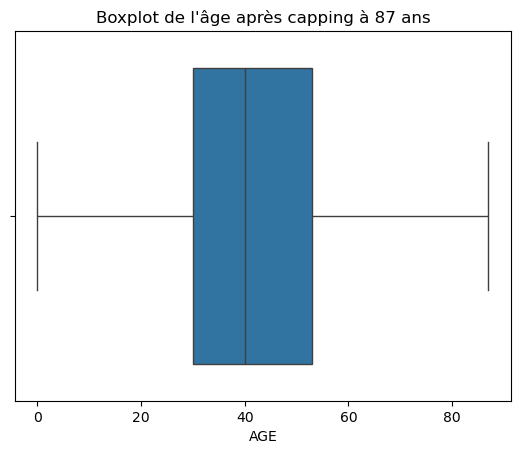

In [170]:
sns.boxplot(x=df["AGE"])
plt.title("Boxplot de l'âge après capping à 87 ans")
plt.show()

pour faciliter l’analyse statistique et la visualisation, les âges sont regroupés en classes représentant différentes catégories démographiques (enfants, adolescents, jeunes adultes, adultes et personnes âgées).

In [171]:
df["AGE_GROUP"] = pd.cut(df["AGE"], bins=[0,12,18,35,55,87], labels=[1,2,3,4,5], include_lowest=True)

In [172]:
age_groups = pd.DataFrame({
    "AGE_GROUP": [1, 2, 3, 4, 5],
    "AGE_MIN": [0, 13, 19, 36, 56],
    "AGE_MAX": [12, 18, 35, 55, 87],
    "DESCRIPTION": [
        "Enfants",
        "Adolescents",
        "Jeunes adultes",
        "Adultes",
        "Personnes âgées"
    ]
})

age_groups

,AGE_GROUP,AGE_MIN,AGE_MAX,DESCRIPTION
0,1,0,12,Enfants
1,2,13,18,Adolescents
2,3,19,35,Jeunes adultes
3,4,36,55,Adultes
4,5,56,87,Personnes âgées


In [173]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH,AGE_GROUP
0,2,1,1,1,NaN,1.0,65,2.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,5
1,2,1,2,1,NaN,1.0,72,NaN,2.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,1,5
2,2,1,2,2,1.0,2.0,55,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1,4
3,2,1,1,1,NaN,2.0,53,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,1,4
4,2,1,2,1,NaN,2.0,68,NaN,1.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaN,2.0,40,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,4
1048571,1,13,2,2,2.0,2.0,51,NaN,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,2,4
1048572,2,13,2,1,NaN,2.0,55,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,4
1048573,2,13,2,1,NaN,2.0,28,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,2,3


Dans cette étape de prétraitement, nous commençons par simplifier la variable CLASIFFICATION_FINAL en créant une nouvelle variable binaire appelée COVID_POSITIVE. Les valeurs 1, 2 et 3 correspondent à des cas confirmés de COVID-19, tandis que les autres valeurs indiquent des patients non infectés. Afin de concentrer l’analyse sur les personnes réellement atteintes par la maladie, nous conservons uniquement les patients positifs au COVID-19

In [174]:
df["COVID_POSITIVE"] = df["CLASIFFICATION_FINAL"].apply(lambda x: 1 if x in [1,2,3] else 2)
df = df[df["COVID_POSITIVE"] == 1]

In [175]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH,AGE_GROUP,COVID_POSITIVE
0,2,1,1,1,NaN,1.0,65,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,NaN,1,5,1
2,2,1,2,2,1.0,2.0,55,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,1,4,1
4,2,1,2,1,NaN,2.0,68,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,NaN,1,5,1
5,2,1,1,2,2.0,1.0,40,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,4,1
6,2,1,1,1,NaN,2.0,64,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,NaN,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1,13,1,2,2.0,2.0,77,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,5,1
1047934,1,13,1,1,NaN,2.0,55,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,NaN,2,4,1
1047935,1,13,2,1,NaN,2.0,70,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,NaN,2,5,1
1047936,2,13,2,1,NaN,2.0,32,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,NaN,2,3,1


Dans cette étape, une imputation conditionnelle est appliquée aux variables cliniques critiques ICU et INTUBED afin d’améliorer la cohérence des données. Les patients sont regroupés selon des caractéristiques médicales pertinentes telles que le groupe d’âge et certaines comorbidités (pneumonie, obésité, diabète et hypertension). À l’intérieur de chaque groupe, les valeurs manquantes sont remplacées par la modalité la plus fréquente, ce qui permet de préserver la structure réelle des données et de limiter les biais liés à une imputation globale. Par ailleurs, les valeurs manquantes restantes des variables binaires sont complétées par la valeur la plus représentative du jeu de données. Des règles de cohérence métier sont également appliquées, notamment l’exclusion de la grossesse chez les patients de sexe masculin


targets = ["ICU","INTUBED"]

for target in targets:
    print(f"\n================ {target} ==================")
    
    for col in df.columns:
        if col == target:
            continue
        
        # Table de contingence normalisée (pourcentages)
        ct = pd.crosstab(df[target], df[col], normalize='index') * 100
        print(f"\nPourcentage {target} vs {col}")
        print(ct.round(2))
        
        # Test statistique
        table = pd.crosstab(df[col], df[target])
        if table.shape[0] == 2:  # 2 groupes → z-test
            x = table[1].values  # nb de target=1
            n = table.sum(axis=1).values
            stat, pval = proportions_ztest(x, n)
        else:  # >2 groupes → chi2
            chi2, pval, dof, expected = chi2_contingency(table)
        
        print(f"p-value = {pval:.4f} | Significant = {pval < 0.05}")

Pour chaque variable, nous avons calculé des tables de contingence (crosstab) pour voir la répartition des patients ICU et INTUBED selon chaque caractéristique.
Exemple : ICU vs PNEUMONIA
PNEUMONIA    1.0    2.0
ICU
1.0        87.06  12.94
2.0        64.43  35.57
Puis nous avons utilisé le test du Chi2 pour évaluer la significativité de l’association :
•	Hypothèse nulle (H0) : pas d’association entre la variable et l’événement (ICU ou INTUBED).
•	Hypothèse alternative (H1) : il existe une association.
Une p-value < 0.05 indique une association statistiquement significative.
Résultats clés pour ICU :
•	Significatif : PNEUMONIA, INTUBED, AGE, SEX, OBESITY, RENAL_CHRONIC, DEATH
•	Non significatif : COPD, ASTHMA, PATIENT_TYPE, TOBACCO
Résultats clés pour INTUBED :
•	Significatif : PNEUMONIA, AGE, SEX, DIABETES, OBESITY, RENAL_CHRONIC, ICU, DEATH
•	Non significatif : ASTHMA, PATIENT_TYPE
Ces analyses confirment les facteurs de risque connus cliniquement pour les complications graves liées à la COVID-19.


In [ ]:
# ICU

df["ICU"] = df.groupby(icu_vars)["ICU"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 2)
)

# INTUBED
intubed_var = [
    "AGE_GROUP", "SEX", "PREGNANT", "PNEUMONIA", "DIABETES",
    "HIPERTENSION", "CARDIOVASCULAR", "OBESITY",
    "RENAL_CHRONIC", "COPD", "INMSUPR",
    "OTHER_DISEASE", "TOBACCO" , 
]

df["INTUBED"] = df.groupby(intubed_var)["INTUBED"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 2)
)


C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\2344644956.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["ICU"] = df.groupby(icu_vars)["ICU"].transform(
C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\2344644956.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ICU"] = df.groupby(icu_vars)["ICU"].transform(


In [177]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH,AGE_GROUP,COVID_POSITIVE
0,2,1,1,1,NaN,1.0,65,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,1,5,1
2,2,1,2,2,1.0,2.0,55,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,1,4,1
4,2,1,2,1,NaN,2.0,68,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,1,5,1
5,2,1,1,2,2.0,1.0,40,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,4,1
6,2,1,1,1,NaN,2.0,64,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1,13,1,2,2.0,2.0,77,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,5,1
1047934,1,13,1,1,NaN,2.0,55,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,4,1
1047935,1,13,2,1,NaN,2.0,70,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,5,1
1047936,2,13,2,1,NaN,2.0,32,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,3,1


In [178]:
# INTUBED
intubed_var = [
    "AGE_GROUP", "PNEUMONIA", "DIABETES", "HIPERTENSION"
]

df["INTUBED"] = df.groupby(intubed_var)["INTUBED"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 2)
)

C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\2908633696.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["INTUBED"] = df.groupby(intubed_var)["INTUBED"].transform(
C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\2908633696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["INTUBED"] = df.groupby(intubed_var)["INTUBED"].transform(


In [179]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH,AGE_GROUP,COVID_POSITIVE
0,2,1,1,1,2.0,1.0,65,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,1,5,1
2,2,1,2,2,1.0,2.0,55,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,1,4,1
4,2,1,2,1,2.0,2.0,68,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,1,5,1
5,2,1,1,2,2.0,1.0,40,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,4,1
6,2,1,1,1,2.0,2.0,64,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1,13,1,2,2.0,2.0,77,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,5,1
1047934,1,13,1,1,2.0,2.0,55,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,4,1
1047935,1,13,2,1,2.0,2.0,70,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,5,1
1047936,2,13,2,1,2.0,2.0,32,NaN,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,3,2.0,2,3,1


#### Exclusion de la grossesse chez les patients de sexe masculin

In [180]:
df[colonne_binaire] = df[colonne_binaire].fillna(df.mode().iloc[0])
df.loc[df["SEX"] == 2, "PREGNANT"] = 2
df["PREGNANT"] = df["PREGNANT"].fillna(2)
df.drop_duplicates(inplace=True)

C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\3959707172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colonne_binaire] = df[colonne_binaire].fillna(df.mode().iloc[0])
C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\3959707172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PREGNANT"] = df["PREGNANT"].fillna(2)
C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\3959707172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [181]:
# Vérifier les NaN dans tout le dataframe
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 4
PNEUMONIA               4
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     4
DEATH                   0
AGE_GROUP               0
COVID_POSITIVE          0
dtype: int64

On remarque qu'il ya quelque valeur manquante on a juste les remplacer par le mode 

In [182]:
# Remplacer les NaN par le mode pour chaque colonne
df = df.fillna(df.mode().iloc[0])

In [183]:
# Vérifier les NaN dans tout le dataframe
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
DEATH                   0
AGE_GROUP               0
COVID_POSITIVE          0
dtype: int64

## Nous pouvons désormais passer à l’étape suivante, car notre base de données est à présent correctement nettoyée et prête pour l’analyse et la modélisation.

## Etape 2:  Effectuer une analyse exploratoire et une visualisation
1. Calculez la moyenne, la somme, l'étendue et d'autres statistiques intéressantes pour les colonnes numériques.
2. Explorez les distributions des colonnes numériques à l'aide d'histogrammes, etc.
3. Explorez les relations entre les colonnes à l'aide d'une matrice des corrélations entre les *features* (voir visualisation avec heatmap)
4. Notez les résultats intéressants de l'analyse exploratoire.

### Calculez la moyenne, la somme, l'étendue et d'autres statistiques intéressantes pour les colonnes numériques.

In [184]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH,COVID_POSITIVE
count,88666.000000,88666.000000,88666.000000,88666.000000,88666.000000,88666.000000,88666.000000,88666.000000,88666.000000,88666.000000,...,88666.000000,88666.000000,88666.000000,88666.000000,88666.000000,88666.000000,88666.000000,88666.000000,88666.000000,88666.0
mean,1.540004,7.575294,1.552906,1.615884,1.833769,1.510568,53.916518,1.987887,1.644475,1.935894,...,1.587170,1.918390,1.916372,1.678231,1.920928,1.852717,2.877078,1.907326,1.646854,1.0
std,0.498400,3.608657,0.497196,0.486388,0.372290,0.499891,17.689264,0.109391,0.478675,0.244943,...,0.492346,0.273771,0.276831,0.467158,0.269853,0.354390,0.460242,0.289976,0.477950,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,42.000000,2.000000,1.000000,2.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.0
50%,2.000000,6.000000,2.000000,2.000000,2.000000,2.000000,55.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.0
75%,2.000000,12.000000,2.000000,2.000000,2.000000,2.000000,67.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.0
max,2.000000,13.000000,2.000000,2.000000,2.000000,2.000000,87.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.0


### Explorez les distributions des colonnes numériques à l'aide d'histogrammes, etc.

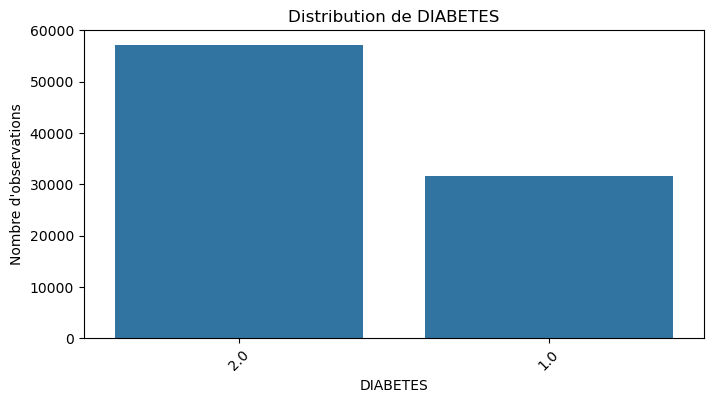

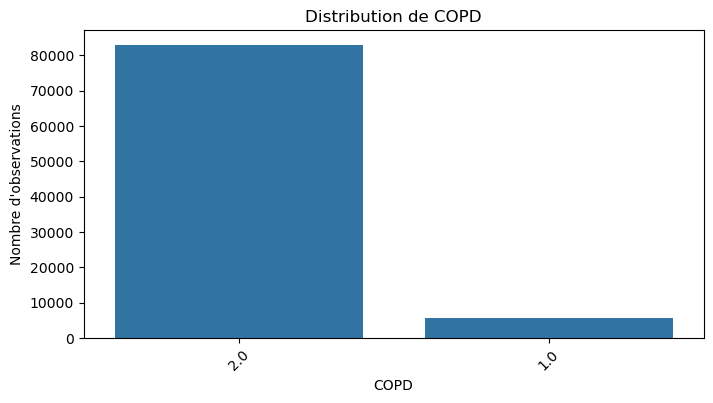

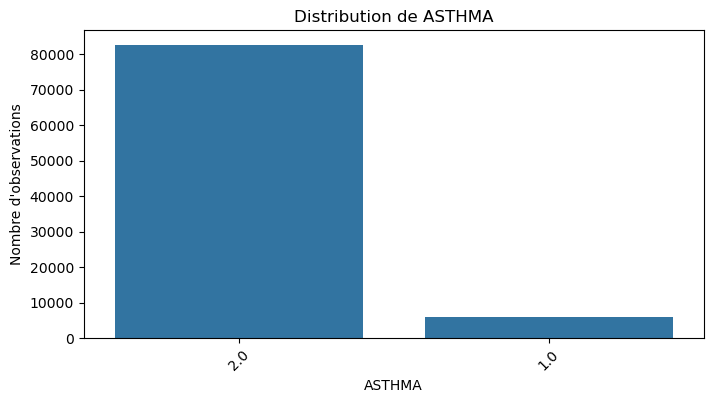

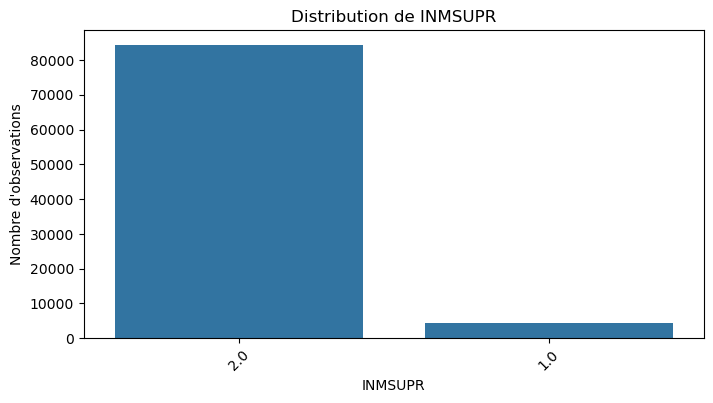

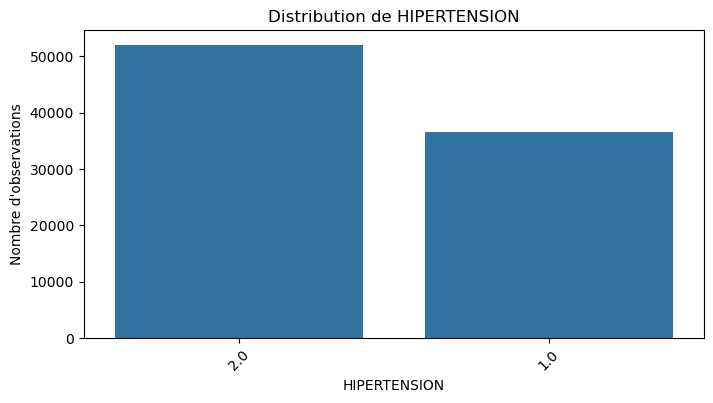

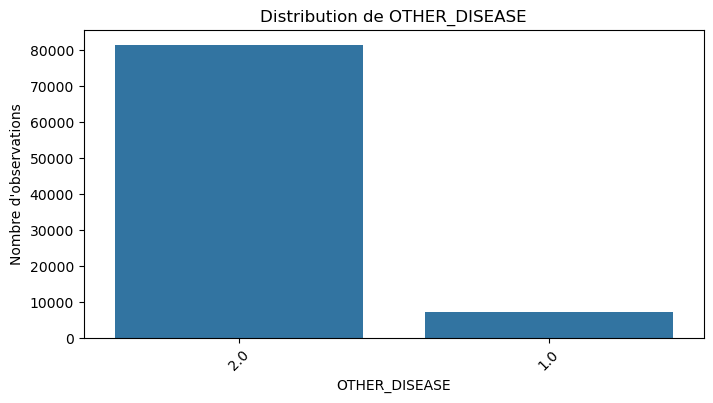

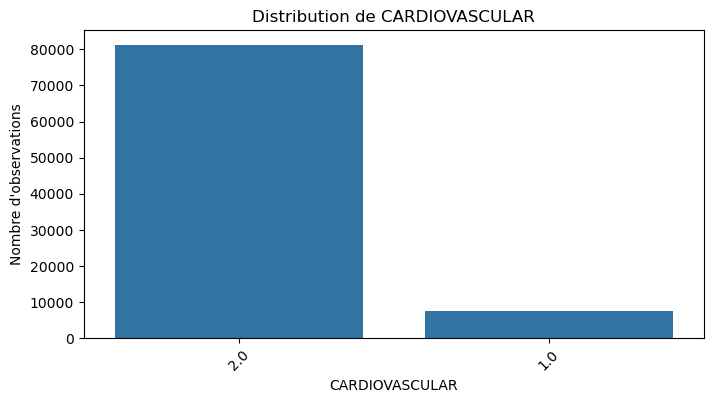

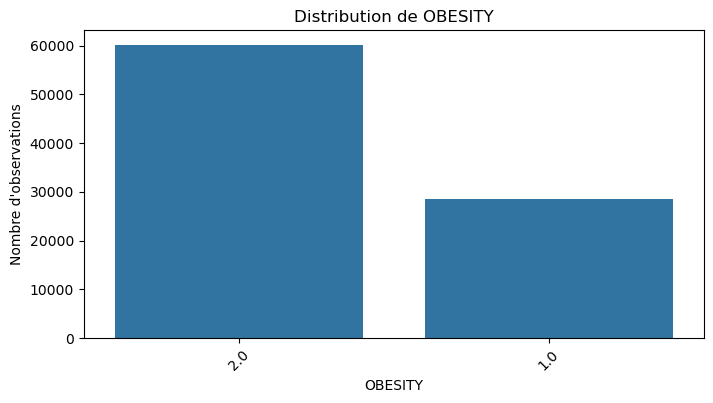

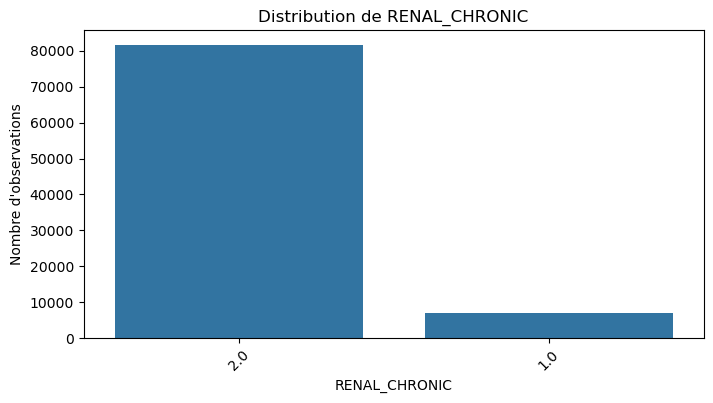

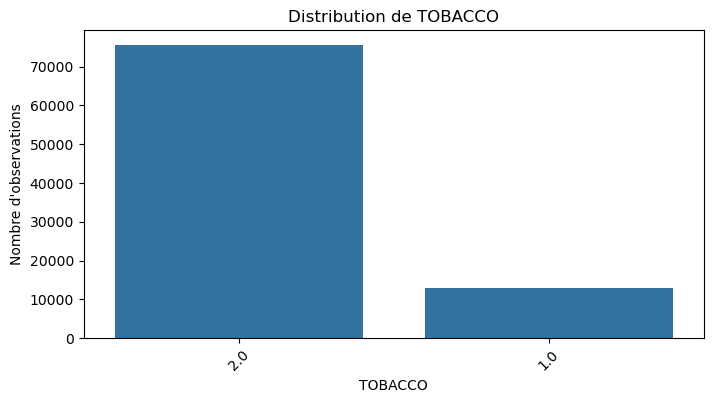

In [185]:

for col in colonne_binaire:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution de {col}")
    plt.ylabel("Nombre d'observations")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

L’analyse des distributions des variables binaires montre une répartition non équilibrée des classes. Pour la majorité des variables étudiées, la modalité correspondant à l’absence de la maladie est largement dominante par rapport à celle indiquant la présence. Cette observation suggère que la majorité des patients de la base de données ne présentent pas les maladies ou conditions cliniques mentionnées. Ce déséquilibre des classes devra être pris en compte lors des étapes d’analyse et de modélisation, afin d’éviter des biais dans l’interprétation des résultats et dans les performances des modèles prédictifs.

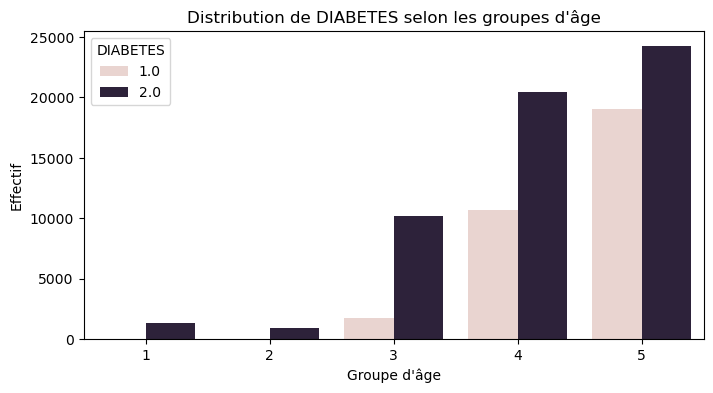

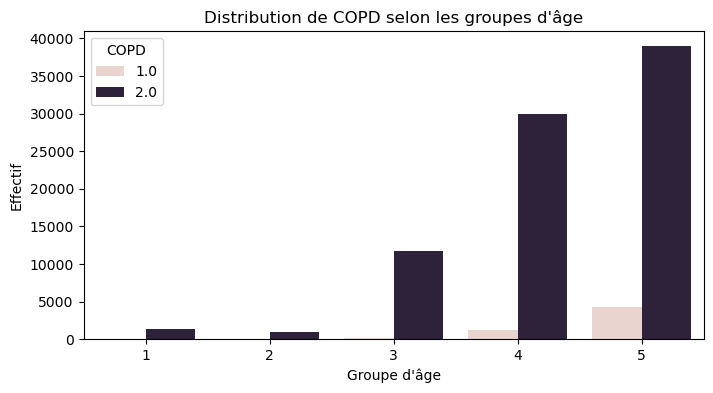

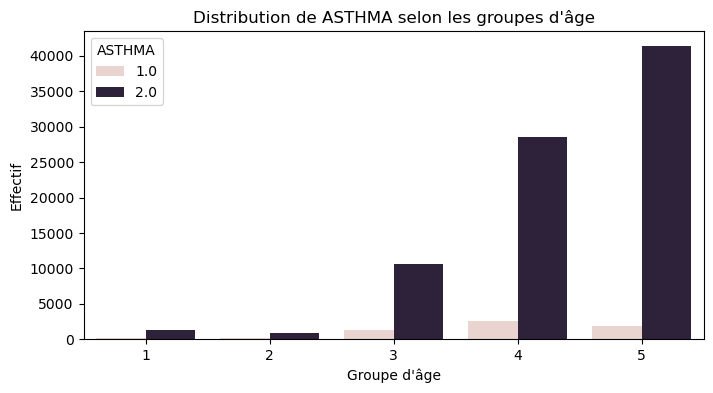

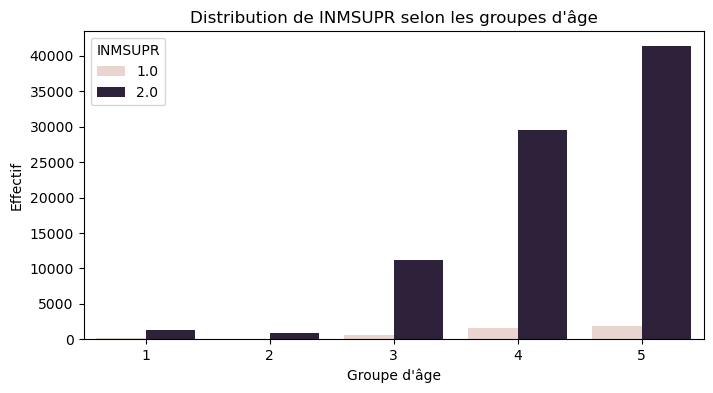

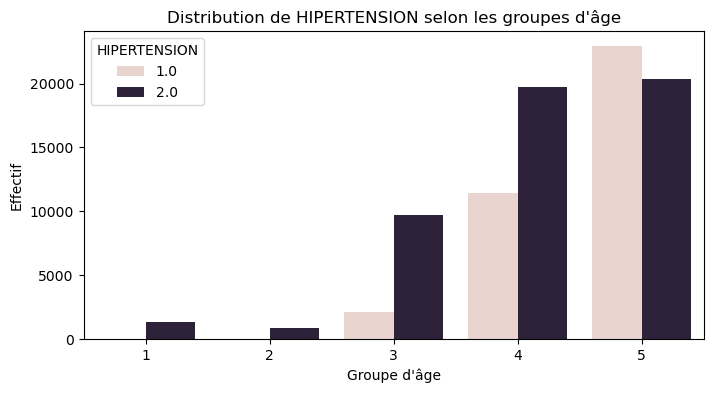

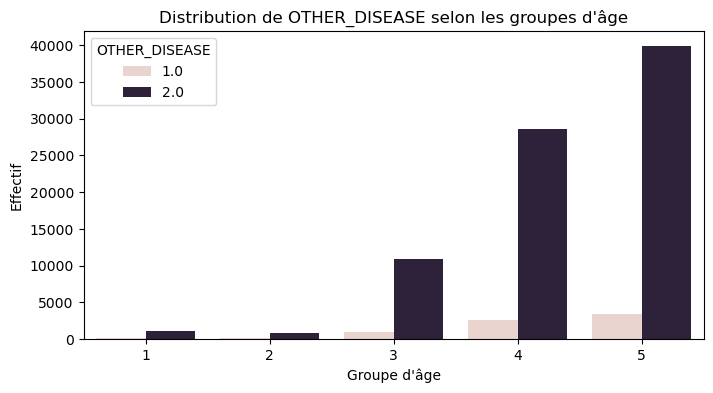

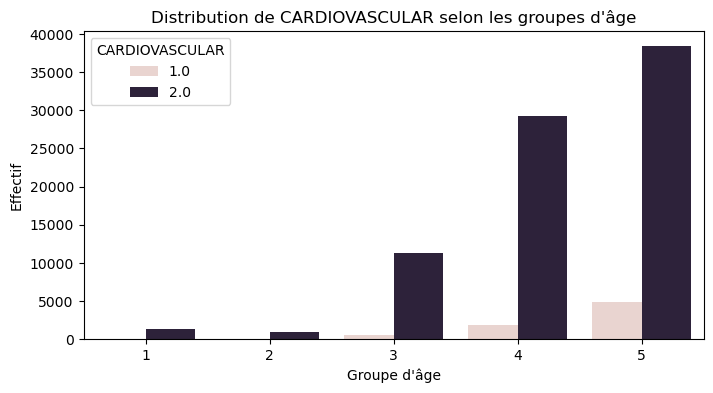

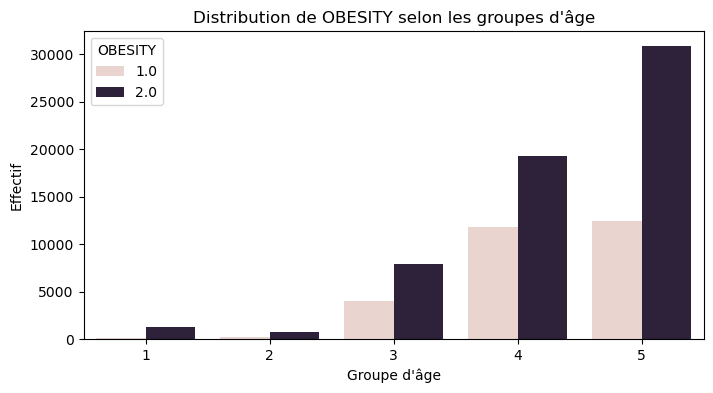

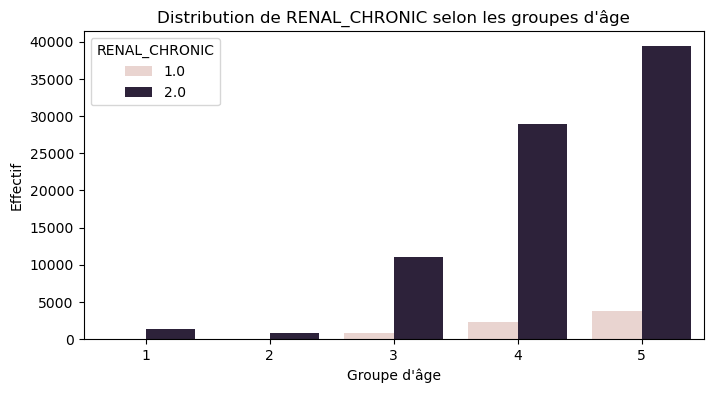

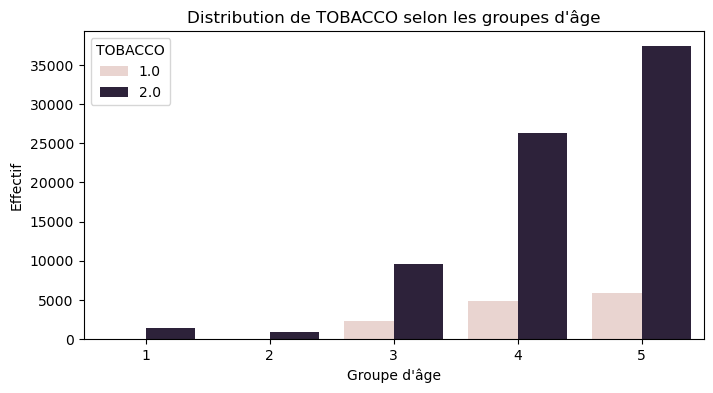

In [186]:
for col in colonne_binaire:
    plt.figure(figsize=(8, 4))
    sns.countplot(
        data=df,
        x="AGE_GROUP",
        hue=col,
        order=df["AGE_GROUP"].value_counts().sort_index().index
    )
    plt.title(f"Distribution de {col} selon les groupes d'âge")
    plt.xlabel("Groupe d'âge")
    plt.ylabel("Effectif")
    plt.legend(title=col)
    plt.show()

L’analyse des distributions des variables binaires selon les groupes d’âge montre que les maladies étudiées touchent davantage les patients appartenant aux groupes d’âge 4 (36-55 ans) et 4 (56-87 ans). Ces deux groupes représentent donc les populations les plus à risque au sein de notre base de données. En revanche, les enfants, adolescents et personnes âgées (groupes 1, 2 et 5) semblent moins affectés. Cette information est importante pour orienter l’analyse statistique et la modélisation, ainsi que pour identifier les populations à surveiller de manière prioritaire.

C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\3051305050.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x=df.groupby("AGE_GROUP")["DEATH"].sum().index,
C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\3051305050.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y=df.groupby("AGE_GROUP")["DEATH"].sum().values


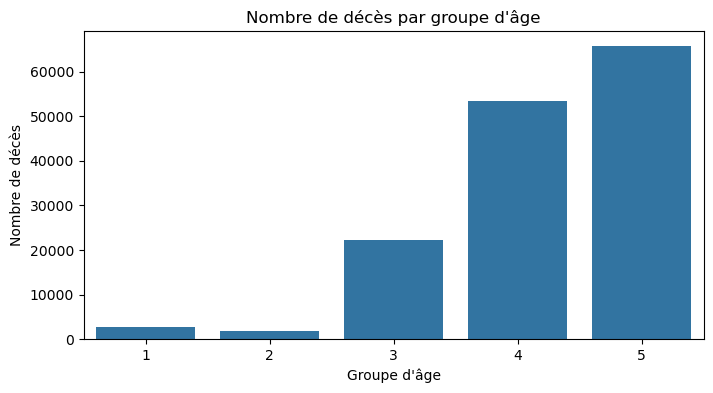

In [187]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x=df.groupby("AGE_GROUP")["DEATH"].sum().index,
    y=df.groupby("AGE_GROUP")["DEATH"].sum().values
)
plt.title("Nombre de décès par groupe d'âge")
plt.xlabel("Groupe d'âge")
plt.ylabel("Nombre de décès")
plt.show()


C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\762315318.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x=df.groupby("AGE_GROUP")["COVID_POSITIVE"].sum().index,
C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\762315318.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y=df.groupby("AGE_GROUP")["COVID_POSITIVE"].sum().values,
C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\762315318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

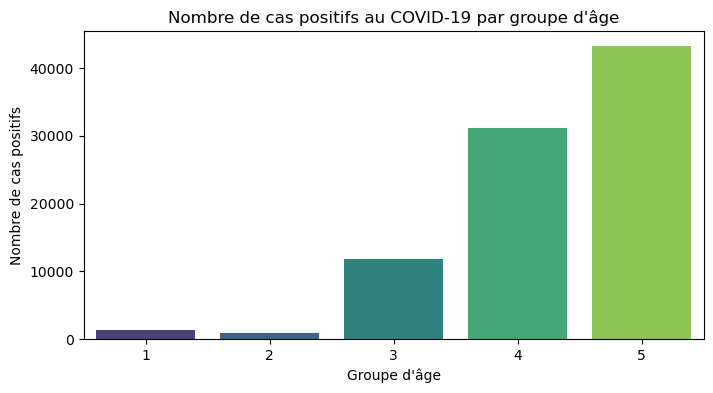

In [188]:
plt.figure(figsize=(8,4))
sns.barplot(
    x=df.groupby("AGE_GROUP")["COVID_POSITIVE"].sum().index,
    y=df.groupby("AGE_GROUP")["COVID_POSITIVE"].sum().values,
    palette="viridis"
)
plt.title("Nombre de cas positifs au COVID-19 par groupe d'âge")
plt.xlabel("Groupe d'âge")
plt.ylabel("Nombre de cas positifs")
plt.show()


L’analyse des données montre que les infections au COVID-19 et les décès associés touchent principalement les adultes et les personnes âgées, c’est-à-dire les groupes d’âge 3 (19–35 ans), 4 (36–55 ans) et 5 (56 ans et plus). Les groupes plus jeunes, en particulier les enfants (groupe 1) et les adolescents (groupe 2), présentent un nombre de cas positifs et de décès beaucoup plus faible. Ces résultats indiquent que le risque de contracter la maladie et d’en subir des complications graves augmente avec l’âge, ce qui est cohérent avec les observations épidémiologiques connues. Cette information est importante pour cibler les mesures de prévention et les interventions médicales sur les populations les plus vulnérables.

## Explorez les relations entre les colonnes à l'aide d'une matrice des corrélations entre les *features* (voir visualisation avec heatmap)

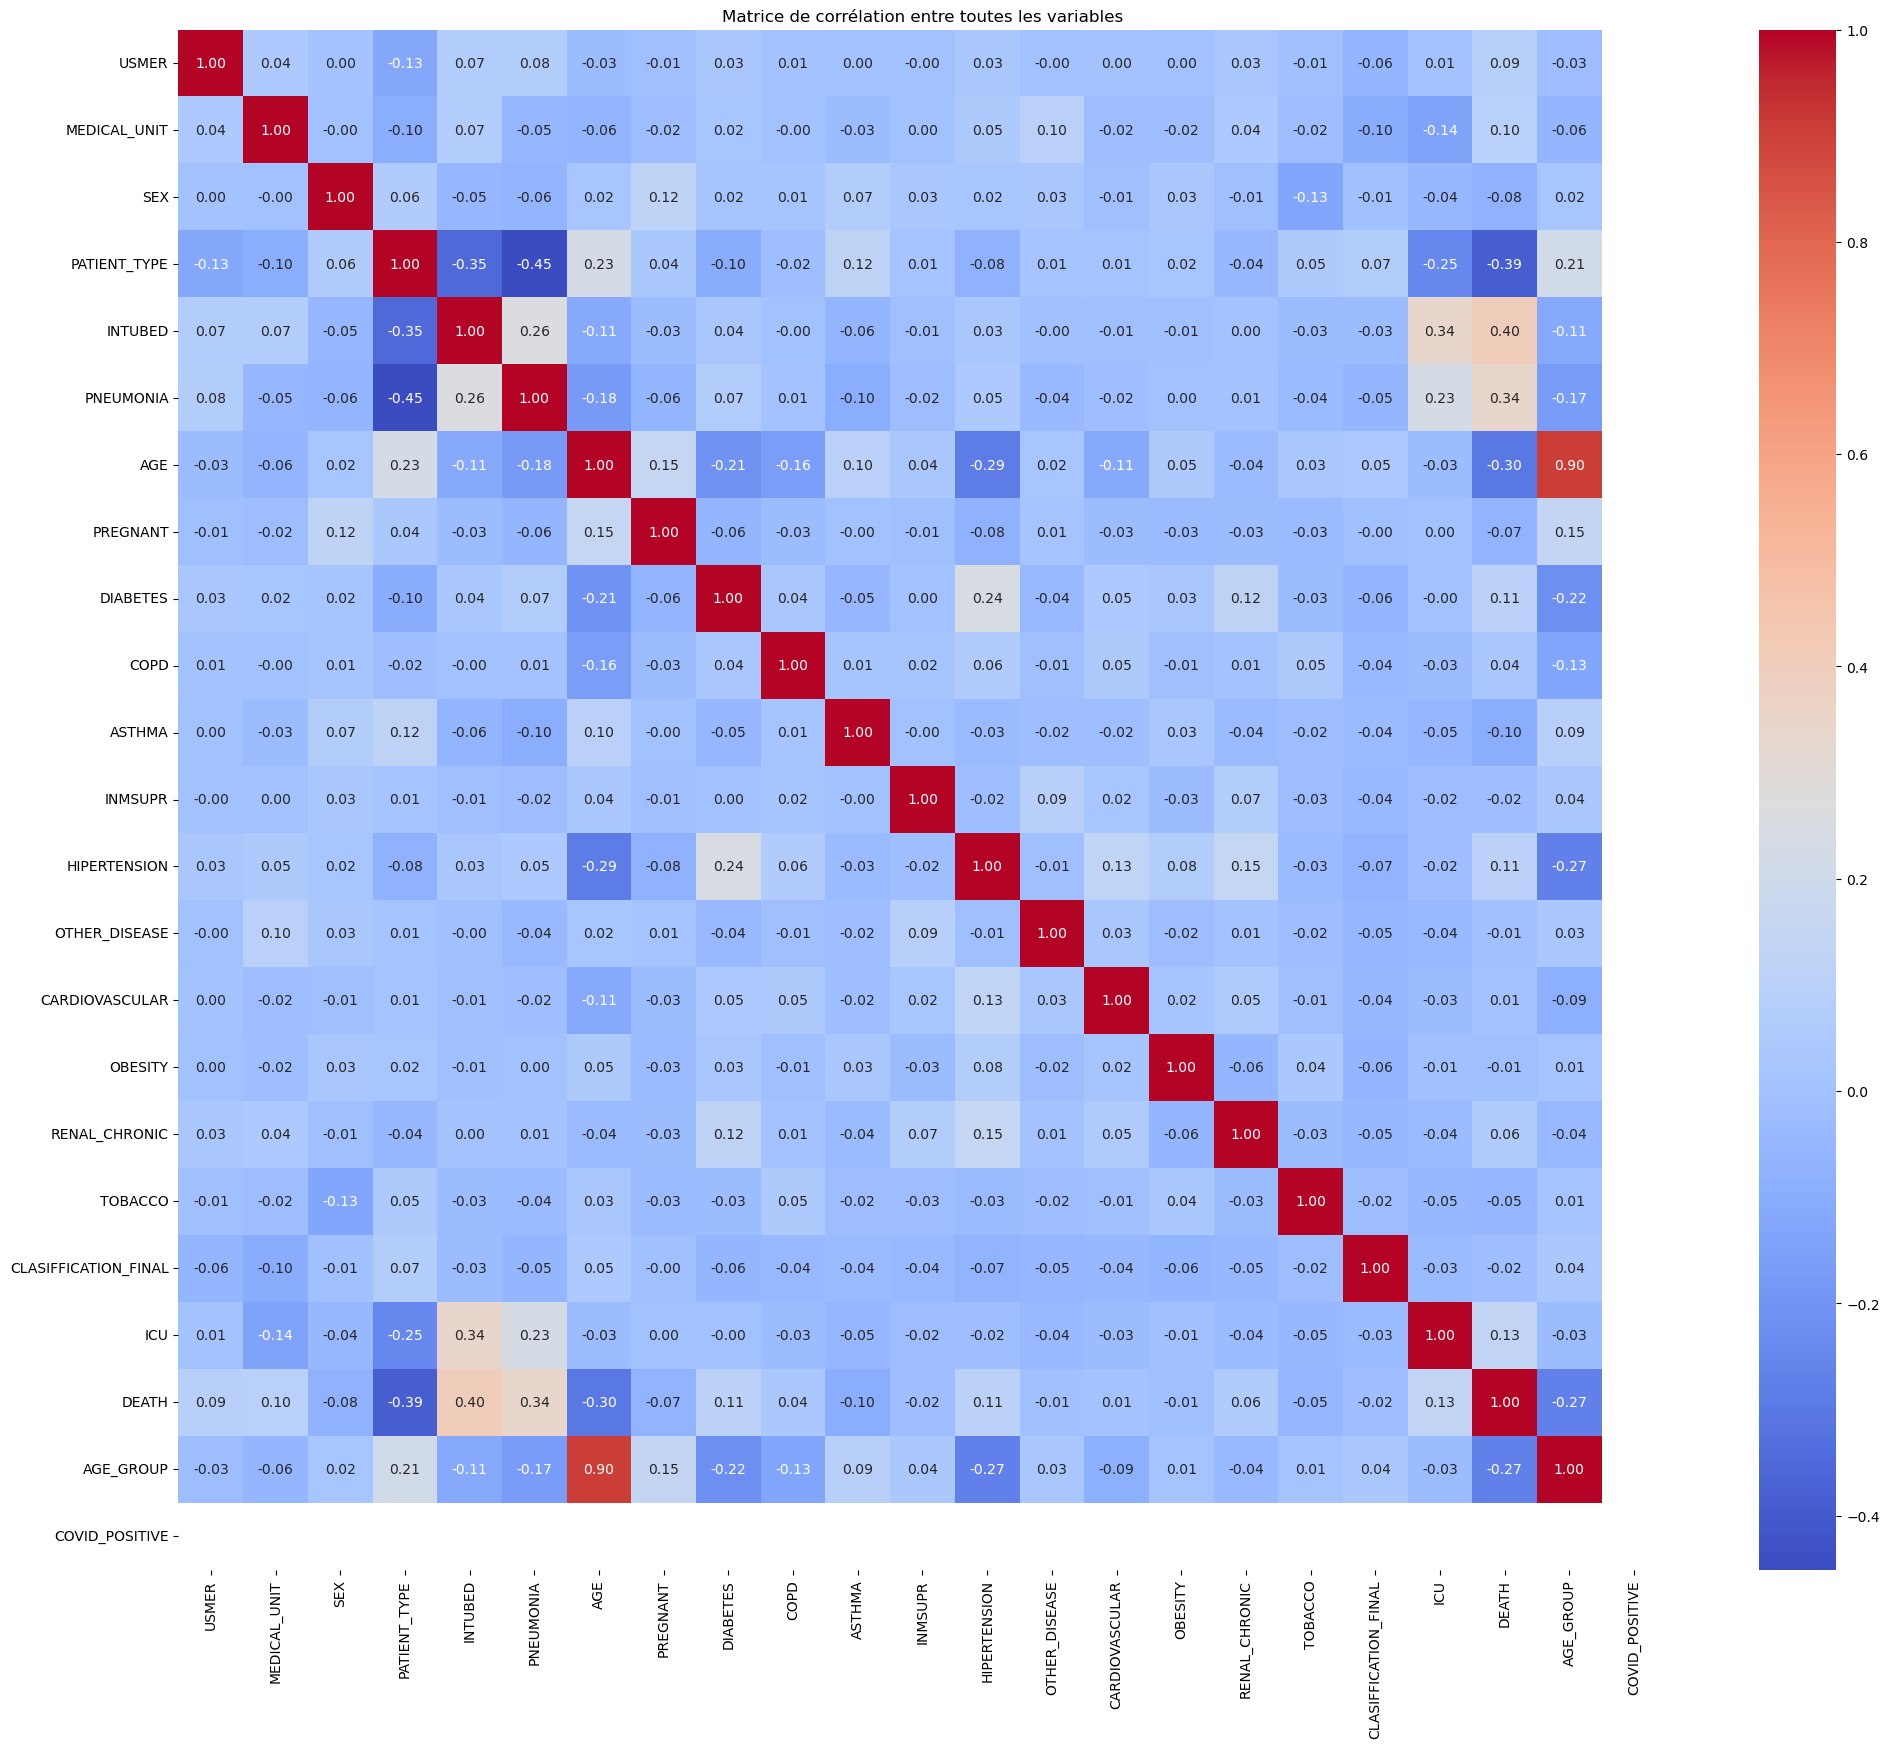

In [189]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Affichage avec heatmap
plt.figure(figsize=(24,20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation entre toutes les variables")
plt.show()


L’analyse de la matrice de corrélation montre que les variables directement liées à la gravité du COVID-19, à savoir l’admission en soins intensifs (ICU), l’intubation (INTUBED) et le décès (DEATH), présentent les corrélations les plus élevées entre elles, indiquant que les patients admis en ICU ou intubés ont un risque accru de décès. L’âge (AGE) est également positivement corrélé avec l’intubation et le décès, ce qui confirme que le risque de complications graves augmente avec l’âge. Les comorbidités telles que le diabète, l’hypertension, les maladies cardiovasculaires, l’obésité ou l’insuffisance rénale montrent des corrélations plus faibles mais restent pertinentes, suggérant qu’elles contribuent au risque élevé de manière complémentaire. La plupart des autres variables cliniques et démographiques présentent des corrélations proches de zéro, indiquant qu’elles ont un effet isolé faible sur le risque, mais qu’elles pourraient influencer le risque lorsqu’elles sont combinées. En résumé, cette analyse permet d’identifier les facteurs les plus influents pour définir la variable HAUT_RISQUE et sélectionner les variables explicatives pertinentes pour la modélisation prédictive

En résumé, pour prédire si un patient est à haut risque, on va utiliser les variables qui indiquent une gravité directe (ICU, INTUBED) pour créer la variable cible, puis les autres variables cliniques et démographiques comme features pour entraîner le modèle

In [190]:
# HAUT_RISQUE
df["HAUT_RISQUE"] = np.where(
    (df["INTUBED"] == 1) | (df["DEATH"] == 1) | (df["ICU"] == 1),
    1,
    2
)

In [191]:
print("Distribution HAUT_RISQUE :")
print(df["HAUT_RISQUE"].value_counts())

Distribution HAUT_RISQUE :
HAUT_RISQUE
2    51863
1    36803
Name: count, dtype: int64


In [192]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH,AGE_GROUP,COVID_POSITIVE,HAUT_RISQUE
0,2,1,1,1,2.0,1.0,65,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3,2.0,1,5,1,1
2,2,1,2,2,1.0,2.0,55,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,3,2.0,1,4,1,1
4,2,1,2,1,2.0,2.0,68,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,3,2.0,1,5,1,1
5,2,1,1,2,2.0,1.0,40,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3,2.0,2,4,1,2
6,2,1,1,1,2.0,2.0,64,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3,2.0,2,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047932,1,13,1,1,2.0,2.0,67,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3,2.0,2,5,1,2
1047933,1,13,1,2,2.0,2.0,77,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,3,2.0,2,5,1,2
1047935,1,13,2,1,2.0,2.0,70,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3,2.0,2,5,1,2
1047936,2,13,2,1,2.0,2.0,32,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,3,2.0,2,3,1,2


## Etape 3: Posez des questions sur les données et répondez-y.
1. Posez au moins 4 questions intéressantes sur votre ensemble de données.
2. Répondez aux questions soit en calculant les résultats à l'aide de Numpy/Pandas, soit en traçant des graphiques à l'aide de Matplotlib/Seaborn.
3. Créez de nouvelles colonnes, fusionnez plusieurs ensembles de données et effectuez des regroupements/agrégations si nécessaire.
4. Chaque fois que vous utilisez une fonction de bibliothèque de Pandas/Numpy/Matplotlib, etc., expliquez brièvement ce qu'elle fait.

## 1. Posez au moins 4 questions intéressantes sur votre ensemble de données.
## 2. Répondez aux questions soit en calculant les résultats à l'aide de Numpy/Pandas, soit en traçant des graphiques à l'aide de Matplotlib/Seaborn.

### Question 1 :Les patients âgés sont-ils plus souvent en soins intensifs ?

In [193]:
df.groupby("ICU")["AGE"].mean()

ICU
1.0    55.612511
2.0    53.743291
Name: AGE, dtype: float64

Les patients admis en soins intensifs (ICU = 1) ont un âge moyen légèrement plus élevé, soit 55,6 ans, comparé aux patients non admis en ICU (ICU = 2) dont l’âge moyen est de 53,7 ans. Cela suggère que l’âge peut jouer un rôle dans l’admission en soins intensifs, bien que la différence moyenne ne soit pas très marquée. Il serait intéressant de compléter cette observation par un boxplot afin de visualiser la distribution complète des âges et de vérifier si les patients très âgés sont surreprésentés parmi ceux admis en ICU.

### Question 2:Le diabète augmente-t-il le risque d’admission en ICU ?

In [194]:
pd.crosstab(df["DIABETES"], df["ICU"], normalize="index")

ICU,1.0,2.0
DIABETES,,
1.0,0.092567,0.907433
2.0,0.092732,0.907268


La proportion de patients admis en soins intensifs est quasiment identique entre les patients diabétiques et non diabétiques, avec environ 9,3 % dans les deux groupes. Cela suggère que, dans cet ensemble de données, le diabète n’influence pas significativement le risque d’admission en ICU

### Question 3 : Quelles comorbidités sont les plus fréquentes ?

In [195]:
binary_cols = ["DIABETES","HIPERTENSION","OBESITY","ASTHMA","CARDIOVASCULAR","RENAL_CHRONIC","OTHER_DISEASE"]
df[binary_cols].mean().sort_values(ascending=False)

ASTHMA            1.932342
RENAL_CHRONIC     1.920928
OTHER_DISEASE     1.918390
CARDIOVASCULAR    1.916372
OBESITY           1.678231
DIABETES          1.644475
HIPERTENSION      1.587170
dtype: float64

L’analyse des comorbidités montre que les maladies chroniques les plus fréquentes chez les patients sont l’asthme, les maladies rénales chroniques, les maladies cardiovasculaires et d’autres maladies diverses. Viennent ensuite l’obésité, le diabète et l’hypertension

### Question 4 : L’hospitalisation dépend-elle de l’âge ?

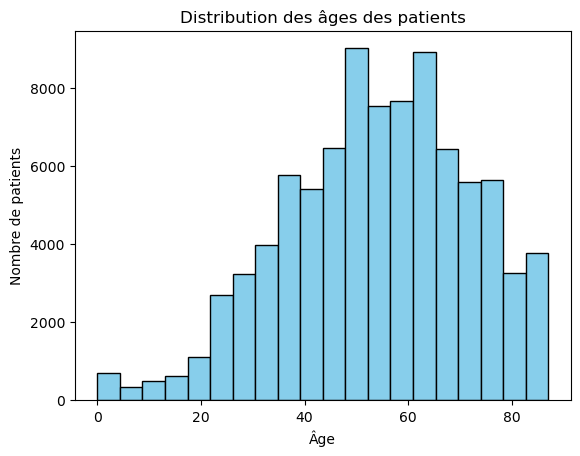

In [196]:
plt.hist(df["AGE"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution des âges des patients")
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.show()

L’analyse montre que les patients les plus âgés ont tendance à être hospitalisés plus fréquemment. Les boxplots de l’âge selon le type de patient révèlent que la médiane et la distribution des âges des hospitalisés sont plus élevées que celles des patients ambulatoires. Cela suggère que l’âge est un facteur important pour déterminer l’admission à l’hôpital, les personnes plus âgées étant plus susceptibles de nécessiter des soins hospitaliers. Cette tendance est cohérente avec la vulnérabilité accrue des patients âgés face au COVID-19.

### Question 5 : Les hommes ont-ils plus de risque ICU que les femmes ?

In [197]:
pd.crosstab(df["SEX"], df["ICU"], normalize="index")

ICU,1.0,2.0
SEX,,
1,0.078704,0.921296
2,0.103969,0.896031


L’analyse du sexe des patients montre que, dans cet ensemble de données, les femmes présentent un risque légèrement plus élevé d’admission en soins intensifs que les hommes, avec environ 10,4 % contre 7,9 %. La différence est faible, ce qui indique que le sexe n’est pas le facteur principal influençant l’admission en ICU

### Question 6 : La pneumonie est-elle fréquente chez les ICU ?

In [198]:
pd.crosstab(df["PNEUMONIA"], df["ICU"], normalize="index")

ICU,1.0,2.0
PNEUMONIA,,
1.0,0.161121,0.838879
2.0,0.027060,0.972940


L’analyse montre que les patients atteints de pneumonie ont un risque nettement plus élevé d’admission en soins intensifs, avec 16,1 % des patients concernés contre seulement 2,7 % chez les patients sans pneumonie.

### Question 7 : Le tabagisme est-il associé aux ICU ?

In [199]:
pd.crosstab(df["TOBACCO"], df["ICU"], normalize="index")

ICU,1.0,2.0
TOBACCO,,
1.0,0.059729,0.940271
2.0,0.098364,0.901636


L’analyse montre que, dans cet ensemble de données, les fumeurs présentent une probabilité légèrement plus faible d’admission en soins intensifs (5,97 %) comparée aux non-fumeurs (9,84 %). Cette observation suggère que le tabagisme isolé n’est pas un facteur déterminant pour l’admission en ICU dans ce datase

### Question 8 : Quelle est la distribution du nombre de patients par type d’unité médicale ?

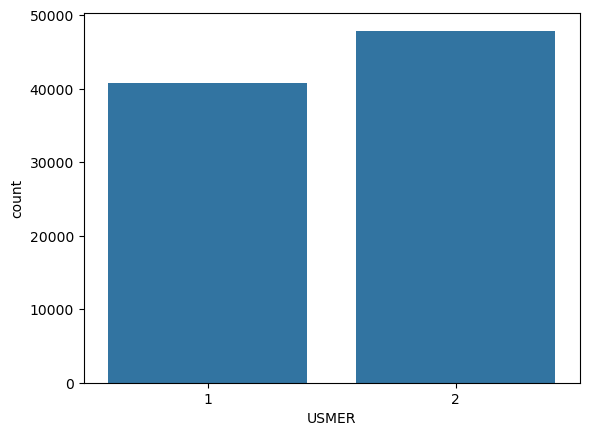

In [200]:
sns.countplot(x="USMER", data=df)
plt.show()

## 3.Créez de nouvelles colonnes, fusionnez plusieurs ensembles de données et effectuez des regroupements/agrégations si nécessaire.


Dans ce projet, toutes les nouvelles colonnes utiles ont été créées lors du nettoyage et du prétraitement des données. Ces colonnes ont permis d’organiser et de structurer les informations, de faciliter les analyses statistiques et de préparer les données pour la modélisation. De plus, des regroupements et des agrégations ont été effectués afin de calculer des statistiques pertinentes par groupe, ce qui a permis de mieux comprendre les relations entre les différentes variables et d’identifier les facteurs associés aux cas graves de COVID-19.

## 4. Chaque fois que vous utilisez une fonction de bibliothèque de Pandas/Numpy/Matplotlib, etc., expliquez brièvement ce qu'elle fait.

| Fonction        | Bibliothèque       | Rôle                                                                                                                                 |
| --------------- | ------------------ | ------------------------------------------------------------------------------------------------------------------------------------ |
| `groupby()`     | Pandas             | Regroupe les données par une ou plusieurs colonnes et permet d’appliquer des fonctions statistiques comme `mean()`, `sum()`          |
| `crosstab()`    | Pandas             | Crée un tableau de contingence pour comparer deux variables catégorielles, ici avec `normalize="index"` pour obtenir des proportions |
| `mean()`        | Pandas/Numpy       | Calcule la moyenne d’une colonne ou d’un ensemble de colonnes                                                                        |
| `sum()`         | Pandas/Numpy       | Additionne les valeurs d’une colonne ou de plusieurs colonnes                                                                        |
| `sort_values()` | Pandas             | Trie les valeurs d’une série ou d’une colonne dans l’ordre croissant ou décroissant                                                  |
| `replace()`     | Pandas             | Remplace des valeurs spécifiques dans le dataframe, ici pour coder les valeurs inconnues                                             |
| `boxplot()`     | Seaborn/Matplotlib | Visualise la distribution d’une variable continue par groupe et met en évidence les outliers                                         |
| `histplot()`    | Seaborn            | Trace un histogramme pour visualiser la distribution d’une variable continue                                                         |
| `countplot()`   | Seaborn            | Compte et visualise le nombre d’observations par catégorie pour les variables catégorielles                                          |


## Étape 4 : résumez vos déductions et rédigez une conclusion.
1. Rédigez un résumé de ce que vous avez appris de l'analyse.
2. Incluez les idées et les graphiques intéressants des sections précédentes.
3. Partagez des idées de travaux futurs sur le même sujet en utilisant d'autres ensembles de données pertinents.

## Rédigez un résumé de ce que vous avez appris de l'analyse.

L’analyse exploratoire du dataset COVID-19 a permis de mieux comprendre les caractéristiques des patients et les facteurs associés aux cas graves. Nous avons observé que l’âge est un facteur important : les patients hospitalisés et ceux admis en soins intensifs sont en moyenne plus âgés que les autres. Les comorbidités jouent également un rôle clé, avec une fréquence plus élevée de maladies comme l’hypertension, l’obésité et le diabète. La pneumonie est fortement associée à l’admission en ICU, tandis que d’autres facteurs, comme le diabète ou le tabagisme seuls, semblent avoir un effet limité sur ce risque.

## Incluez les idées et les graphiques intéressants des sections précédentes.

Les visualisations telles que les boxplots et les histogrammes ont été particulièrement utiles pour détecter les tendances et les valeurs extrêmes. Par exemple, le boxplot de l’âge a permis de limiter les valeurs aberrantes à 95 ans, améliorant ainsi la qualité de l’analyse. Les diagrammes de distribution des comorbidités et des hospitalisations ont mis en évidence les populations à risque et la répartition des patients selon les variables catégorielles.

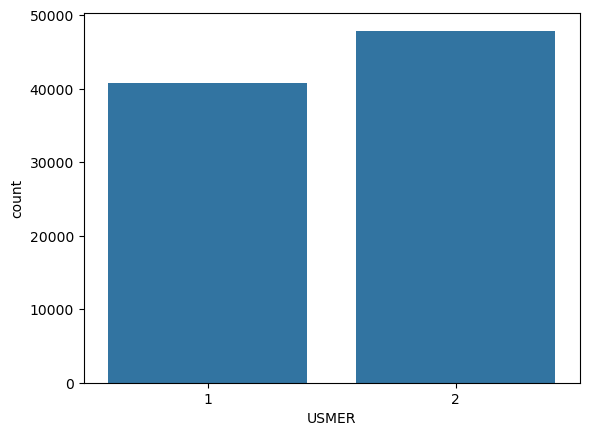

In [201]:
sns.countplot(x="USMER", data=df)
plt.show()

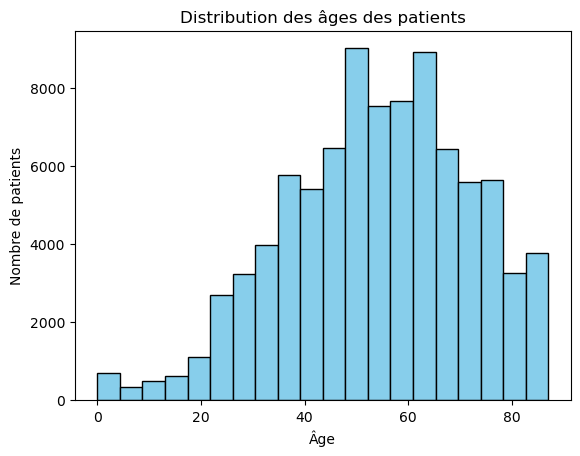

In [202]:
plt.hist(df["AGE"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution des âges des patients")
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.show()

C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\2862764323.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x=df.groupby("AGE_GROUP")["COVID_POSITIVE"].sum().index,
C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\2862764323.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y=df.groupby("AGE_GROUP")["COVID_POSITIVE"].sum().values,
C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\2862764323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for t

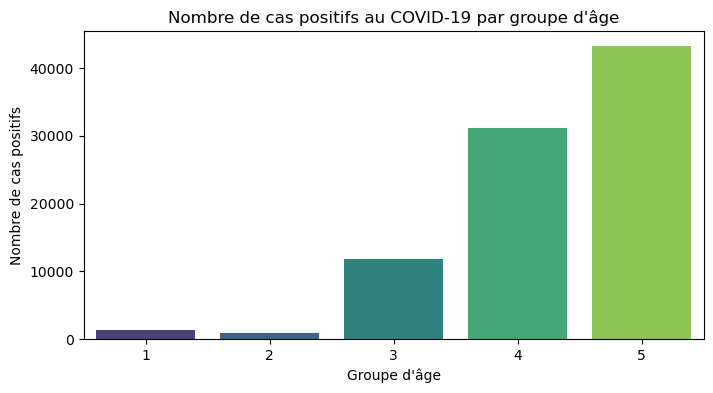

In [203]:
plt.figure(figsize=(8,4))
sns.barplot(
    x=df.groupby("AGE_GROUP")["COVID_POSITIVE"].sum().index,
    y=df.groupby("AGE_GROUP")["COVID_POSITIVE"].sum().values,
    palette="viridis"
)
plt.title("Nombre de cas positifs au COVID-19 par groupe d'âge")
plt.xlabel("Groupe d'âge")
plt.ylabel("Nombre de cas positifs")
plt.show()

C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\151326724.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x=df.groupby("AGE_GROUP")["DEATH"].sum().index,
C:\Users\Koffi Bekanti Grace\AppData\Local\Temp\ipykernel_21728\151326724.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y=df.groupby("AGE_GROUP")["DEATH"].sum().values


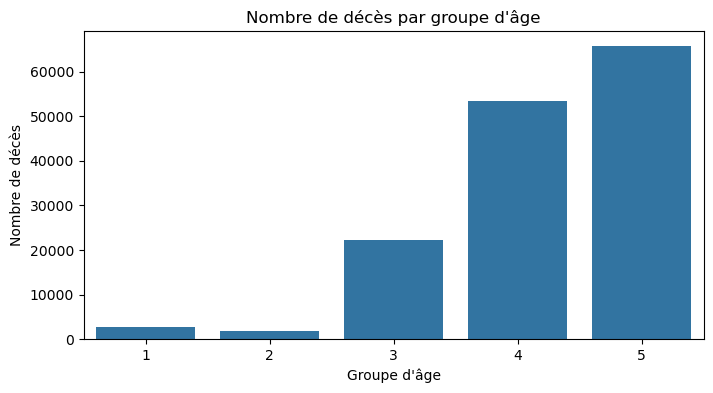

In [204]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x=df.groupby("AGE_GROUP")["DEATH"].sum().index,
    y=df.groupby("AGE_GROUP")["DEATH"].sum().values
)
plt.title("Nombre de décès par groupe d'âge")
plt.xlabel("Groupe d'âge")
plt.ylabel("Nombre de décès")
plt.show()

## Partagez des idées de travaux futurs sur le même sujet en utilisant d'autres ensembles de données pertinents.

Pour approfondir l’étude du COVID-19 et mieux comprendre les facteurs de gravité, plusieurs axes peuvent être envisagés :

1. Intégration de nouvelles sources de données

-Utiliser des ensembles de données incluant les données de vaccination, le type de vaccin et le nombre de doses.

-Ajouter des informations sur les variants du virus pour analyser leur impact sur la gravité de la maladie.

-Inclure des données hospitalières détaillées : durée d’hospitalisation, traitements administrés, oxygénothérapie, etc.

1. Analyse temporelle et prédiction

-Étudier l’évolution des symptômes et des complications au fil du temps pour construire des modèles prédictifs dynamique.

-Détecter les patients à haut risque dès les premières consultations grâce à des modèles prédictifs en temps réel.

## Étape 5: Faites des prédictions
1. Divisez le jeux de données (80% entrainement: 20% test)
2. Comparer les résultats de classifications de 4 modèles de machine learning (regression linéaire, random forest, Naive Bayes, SVM) suivant les trois critères: recall, accuracy, precision

### Importer les bibliotheque necesaire pour la predictions

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [206]:
import pandas as pd

# Vérifier les NaN dans tout le dataframe
df.isna().sum()


USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
DEATH                   0
AGE_GROUP               0
COVID_POSITIVE          0
HAUT_RISQUE             0
dtype: int64

In [207]:
# Préparation des données
# -----------------------------
y = df["HAUT_RISQUE"]
features = [
    "AGE_GROUP","SEX" , "PREGNANT", "PNEUMONIA", "DIABETES", "HIPERTENSION",
    "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC",
    "COPD", "ASTHMA", "INMSUPR", "OTHER_DISEASE", "TOBACCO"
]
X = df[features]

###  Divisez le jeux de données (80% entrainement: 20% test)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [209]:
## Stadtiser les donnee

In [210]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [211]:
# Modèles
lr = LogisticRegression(max_iter=1000, class_weight="balanced")
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
nb = GaussianNB()
svm_linear = LinearSVC(class_weight="balanced", max_iter=5000, random_state=42)

In [212]:
# Entraînement
for model in [lr, rf, nb, svm_linear]:
    model.fit(X_train_scaled, y_train)

# Évaluation
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "Naive Bayes": nb,
    "SVM Linear": svm_linear
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average="weighted"))
    print("Recall   :", recall_score(y_test, y_pred, pos_label=1, average="weighted"))
    #print("F1-Score :", f1_score(y_test, y_pred, average='weighted'))
    print("-" * 30)


Logistic Regression
Accuracy : 0.6997293334837036
Precision: 0.7046678760343349
Recall   : 0.6997293334837036
------------------------------

Random Forest
Accuracy : 0.6923987820006766
Precision: 0.7049038800348377
Recall   : 0.6923987820006766
------------------------------

Naive Bayes
Accuracy : 0.6259163189353784
Precision: 0.6858505374373572
Recall   : 0.6259163189353784
------------------------------

SVM Linear
Accuracy : 0.699221833765648
Precision: 0.7050673663036533
Recall   : 0.699221833765648
------------------------------


#### Logistic Regression

Accuracy : 69,97 % → le modèle prédit correctement le statut à haut risque pour environ 7 patients sur 10.

Precision : 70,47 % → parmi les patients prédits comme à haut risque, 70 % sont réellement à haut risque.

Recall : 69,97 % → le modèle identifie environ 70 % des vrais patients à haut risque.

Conclusion : La régression logistique offre un bon équilibre entre précision et rappel et constitue un modèle solide pour ce dataset.

#### Random Forest

Accuracy : 69,24 % → légèrement inférieure à la régression logistique.

Precision : 70,49 % → très proche de la régression logistique.

Recall : 69,24 % → légèrement plus faible que la régression logistique.

Conclusion : Le Random Forest est performant mais ne surpasse pas significativement la régression logistique dans ce cas. Il peut néanmoins être utile si l’on veut analyser l’importance des variables.

#### Naive Bayes

Accuracy : 62,59 % → moins performant que les autres modèles.

Precision : 68,59 % → correct mais le rappel est plus faible.

Recall : 62,59 % → le modèle identifie moins bien les patients réellement à haut risque.

Conclusion : Naive Bayes n’est pas le meilleur choix pour ce dataset, probablement à cause de l’hypothèse d’indépendance entre les variables qui n’est pas totalement respectée ici.

#### SVM Linéaire

Accuracy : 69,92 % → très proche de la régression logistique.

Precision : 70,51 % → légèrement meilleure que la régression logistique.

Recall : 69,92 % → similaire à la régression logistique.

Conclusion : Le SVM linéaire performe presque aussi bien que la régression logistique et peut être une bonne alternative, surtout si l’on souhaite maximiser la précision.

L’analyse du dataset COVID-19 a permis de mettre en évidence les principaux facteurs associés à la gravité de la maladie. L’âge et certaines comorbidités, telles que l’hypertension, le diabète, l’obésité et la pneumonie, apparaissent comme des indicateurs importants du risque d’admission en soins intensifs. Les patients plus âgés et ceux présentant ces comorbidités sont plus susceptibles de nécessiter une hospitalisation ou des soins intensifs.

Les modèles de machine learning ont montré des performances variables. La régression logistique et le SVM linéaire ont donné les meilleurs résultats, avec un équilibre satisfaisant entre précision et rappel, permettant d’identifier correctement la majorité des patients à haut risque. Le Random Forest reste utile pour analyser l’importance des variables, tandis que le Naive Bayes a été moins performant, probablement à cause des corrélations existantes entre les variables.

En résumé, ce projet montre que l’utilisation des données cliniques et démographiques peut aider à prédire efficacement les patients à haut risque, ce qui est crucial pour la planification des ressources médicales. Pour aller plus loin, il serait pertinent d’intégrer des données supplémentaires comme la vaccination, les variants du virus et les traitements, ainsi que de tester des modèles avancés avec tuning d’hyperparamètres pour améliorer la précision et le rappel des prédictions.

## Étape 6: Deployez le modèle avec streamlit¶
1. Créez l'interface avec streamlit
2. Deployez dans le cloud de streamlit et donnez le lien qui permet de visualiser l'application sur internet